# Fitting lines and circles into two-dimensional point sets

Many computer vision algorithms deal with points. They may be contour points, or key points, or something else. And, in some cases, we know that all of these points should lie on the same curve, with a known mathematical shape. The process of finding the parameters of the curve (in the case of noisy data) is called approximation. Here, we're going to review two functions from OpenCV which find approximations for the ellipse and line for a set of points.

In OpenCV, different functions are aimed at finding approximations for different types of curves: `cv2.fitEllipse` for ellipses and `cv2.fitLine` for lines. Both perform similar actions, minimize distances between points from the set we're fitting to the resulting curve, and require some minimal number of points to fit (five for `cv2.fitEllipse` and two for `cv2.fitLine`).

`cv2.fitEllipse` only accepts the argument of a set of two-dimensional points, for which we need to find curve parameters, and it returns the found ones, center point, half axes lengths, and rotation angle. These parameters can be directly passed to the `cv2.ellipse` drawing function when we want to display the result.

Another function, `cv2.line`, has more parameters. As previously, it takes a points set as its first argument, and also the type of distance function to minimize, the value to control distance functions, and the acceptable accuracy for the (`x0, y0`) point and the (`vx, vy`) line coefficients. (`x0, y0`) determines the point through which our line passes. The function returns (`x0, y0, vx, vy`) values for the line parameters which best fit the points set. It's important to mention that `cv2.line` is able to work not only with twodimensional points, but with three-dimensional ones too, and the algorithm itself is robust to outliers in set-points, which are the result of huge noises or mistakes. Both facts make the routine very handy for practical usage. If we're passing three-dimensional points to `cv2.line`, we of course get the parameters of a three-dimensional line.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


axes  == (140, 183) <class 'tuple'> <class 'int'> <class 'int'>
angle == 108 <class 'int'>
------  Original-----------------    Shape(512, 512, 3) image: uint8
[ [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] ]


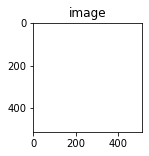

In [2]:
np.random.seed(0)
# Create an image where we're going to draw 
# and randomly generate parameters of the ellipse

image = np.full((512, 512, 3), 255, np.uint8)

axes = (int(256*random.uniform(0, 1)), int(256*random.uniform(0, 1)))
angle = int(180*random.uniform(0, 1))
center = (256, 256)




#####################################
print("axes  ==",axes, type(axes), type(axes[0]), type(axes[0]) )
print("angle ==",angle, type(angle))
print_image('Original','image',image,0,1,0,10)

plt_view_image(plt,[["image",image]], figsize=(2,2), axis='on', cmap='gray')

------  pts----------------------    Shape(361, 2) pts: int32
[ 213 389 ]
[ 210 388 ]
[ 207 387 ]
------  pts----------------------    Shape(361, 2) pts: int32
[ 183 377 ]
[ 180 376 ]
[ 177 374 ]


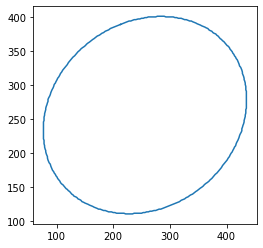

In [3]:
pts = cv2.ellipse2Poly(center, axes, angle, 0, 360, 1)



#####################################
#cv2.ellipse2Poly(center, axes, angle, arcStart, arcEnd, delta) -> pts
#  center – Center of the arc.
#  axes – Half of the size of the ellipse main axes. See the ellipse() for details.
#  angle – Rotation angle of the ellipse in degrees. See the ellipse() for details.
#  arcStart – Starting angle of the elliptic arc in degrees.
#  arcEnd – Ending angle of the elliptic arc in degrees.
#  delta – Angle between the subsequent polyline vertices. It defines the approximation accuracy.
#  pts – Output vector of polyline vertices.

print_image('pts','pts',pts,0,3,0,2)
print_image('pts','pts',pts,10,13,0,2)

plt.figure(figsize=(4,4))
plt.plot(pts[:,0],pts[:,1])
plt.show()

------  pts----------------------    Shape(361, 2) pts: int32
[ 213 388 ]
[ 212 387 ]
[ 214 396 ]
------  pts----------------------    Shape(361, 2) pts: int32
[ 188 370 ]
[ 182 369 ]
[ 185 374 ]


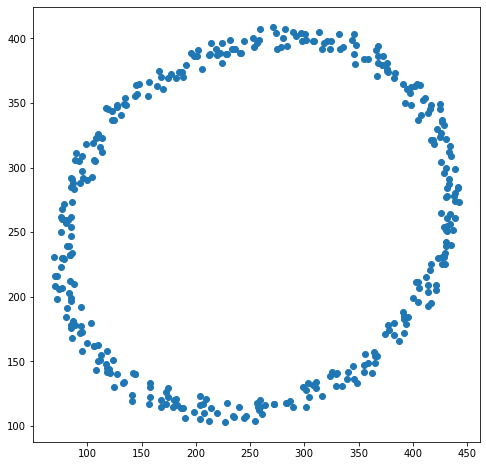

In [4]:
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)


###################################################
print_image('pts','pts',pts,0,3,0,2)
print_image('pts','pts',pts,10,13,0,2)
plt.figure(figsize=(8,8))
plt.plot(pts[:,0],pts[:,1],'o')
plt.show()

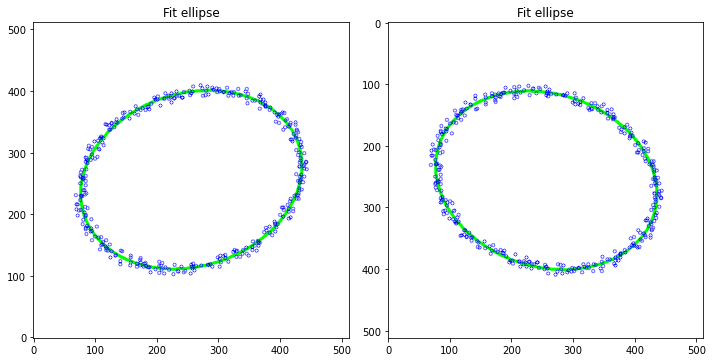

In [5]:
cv2.ellipse(image, center, axes, angle, 0, 360, (0, 255, 0), 3)

for pt in pts:
    cv2.circle(image, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

    

#############################################
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.axis('on')
plt.title('Fit ellipse')
plt.imshow(image, cmap='gray')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.subplot(122)
plt.axis('on')
plt.title('Fit ellipse')
plt.imshow(image, cmap='gray')
plt.tight_layout()
plt.show()

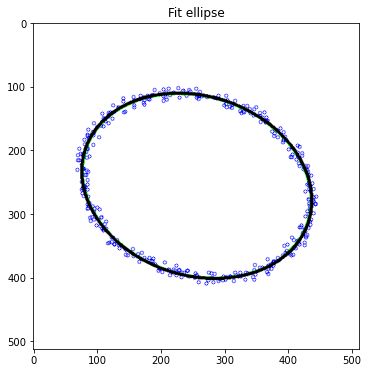

In [6]:
ellipse = cv2.fitEllipse(pts)
cv2.ellipse(image, ellipse, (0, 0, 0), 3)


#############################################
plt_view_image(plt,[["Fit ellipse",image]], figsize=(6,6), axis='on', cmap='gray')

In [7]:
img = np.full((512, 512, 3), 255, np.uint8)

pts = np.arange(512).reshape(-1, 1)
pts = np.hstack((pts, pts))
pts += np.random.uniform(-10, 10, pts.shape).astype(np.int32)

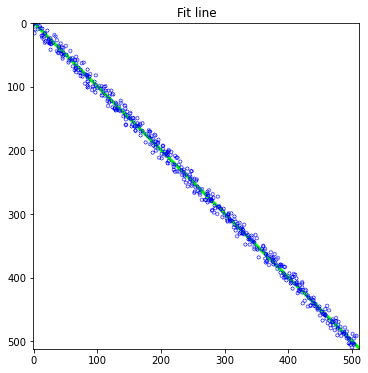

In [8]:
cv2.line(img, (0,0), (512, 512), (0, 255, 0), 3)

for pt in pts:
    cv2.circle(img, (int(pt[0]), int(pt[1])), 3, (0, 0, 255))

    
###################################################
plt_view_image(plt,[["Fit line",img]], figsize=(6,6), axis='on', cmap='gray')

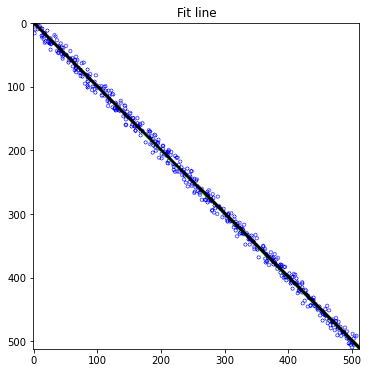

In [9]:
vx,vy,x,y = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
y0 = int(y - x*vy/vx)
y1 = int((512 - x)*vy/vx + y)
cv2.line(img, (0, y0), (512, y1), (0, 0, 0), 3)



#####################################################
plt_view_image(plt,[["Fit line",img]], figsize=(6,6), axis='on', cmap='gray')